# Доп. задачи и анализа данных
## Задание 2.6

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решение задачи должно быть на языке **R**, если не указано иное.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.

**Баллы за задание:**

* Задача 1 -  5 баллов
* Задача 2 -  5 баллов
* Задача 3 -  4 баллов
* Задача 4 -  4 баллов
* Задача 5 -  3 балла

In [64]:
options(repr.plot.width = 10, repr.plot.height = 8)

### Задача 1.

Пусть $X_1, ..., X_n$ — выборка из гамма-распределения $\Gamma(\theta, 5)$. Постройте равномерно наиболее мощный критерий для проверки гипотез $\mathsf{H}_0\colon \theta = 1\ vs. \mathsf{H}_1\colon \theta<1$. 

a). Сгенерируйте выборку $X_1, ..., X_{50}$ из гамма-распределения $\Gamma(\theta, 5)$ для случаев $\theta=1$,  $\theta=0.3$ и $\theta=5$. В каждом случае посчитайте p-value. В каких случаях основная гипотеза отвергается?

b). На одном графике постройте кривые мощности для разных размеров выборки (см. лекции прошлого семестра).

**Пункт а.**

$\theta = 1.$

In [65]:
theta_0 = 1
theta = 1
n = 50
beta = 5

X = rgamma(shape = beta, scale = 1 / theta, n = n)
X

[1] 11.479939  8.840635  3.961854  5.410104  3.338352  4.646920  6.661004
 [8]  3.642169  7.580803  6.066813  5.158560  5.572801  1.475451  4.203690
[15]  2.575417  2.455535  5.704631  2.290847  5.287500  7.189998  3.456042
[22]  4.624808  4.047291  5.750131  4.675856  5.048253  6.891747  4.009654
[29]  7.502095  3.895649  8.695492  3.277474  5.082463  3.572931  2.340361
[36]  5.405353  6.880907  5.412597  5.362145  5.973944  3.694008  4.651500
[43]  3.245035  3.241717  7.355504  6.226456  7.449572  6.007043  4.207503
[50]  7.271045

In [66]:
t = sum(X)
pval = pgamma(shape = beta * n, scale = 1 / theta_0, q = t, lower.tail = F)
pval

[1] 0.2839877

$\theta = 0.3.$

In [67]:
theta = 0.3

X = rgamma(shape = beta, scale = 1 / theta, n = n)
X

[1] 11.823388  6.553142 28.879508 12.628348 28.728916 22.417338 17.932837
 [8] 34.145927 13.022174 18.133677 39.010535 15.651200  9.994896 10.088111
[15] 24.806398 17.879309 20.928452 14.847831 16.191280  4.682544 16.201725
[22]  8.153022 15.559851 32.476557  8.845424 20.716136 10.869965 17.530306
[29]  5.585742 17.091225  4.769873 11.128027 11.035994 20.090636  7.147330
[36] 27.628184 23.168703 21.600656 20.587375 11.371456 28.857760 15.698698
[43] 13.222776  9.057591 18.799455 17.565272 15.579287 30.213078 20.190596
[50] 10.241389

In [68]:
t = sum(X)
pval = pgamma(shape = beta * n, scale = 1 / theta_0, q = t, lower.tail = F)
pval

[1] 2.755795e-133

$\theta = 5.$

In [69]:
theta = 5

X = rgamma(shape = beta, scale = 1 / theta, n = n)
X

[1] 0.8721787 0.2196213 1.2925655 0.9141654 1.2152786 0.3055617 0.9712606
 [8] 1.4348730 0.6395557 0.7018488 0.7528934 1.1468826 0.8174208 0.4568216
[15] 0.6574540 0.8677683 0.9966591 0.4835708 0.8982234 0.5720831 0.9087899
[22] 1.2213780 0.2651041 1.3308720 0.5654498 0.6625575 1.0698840 1.6488588
[29] 0.7311515 1.5254509 0.6096095 0.7645774 0.8657103 0.9311981 0.7143446
[36] 0.3889593 0.2919022 1.5729748 0.6719677 0.4527661 0.6046245 0.4398957
[43] 0.4590636 2.0724851 1.2373185 0.6709616 0.9459328 0.4738902 0.5537616
[50] 1.1903296

In [70]:
t = sum(X)
pval = pgamma(shape = beta * n, scale = 1 / theta_0, q = t, lower.tail = F)
pval

[1] 1

**Пункт b.**

In [71]:
f = function(n, theta, theta_0, beta, alpha = 0.05) {
#     print(n)
    c_alpha = qgamma(shape = beta * n, scale = 1 / theta_0, p = alpha, lower.tail = F)
    pow = pgamma(q = c_alpha, shape = beta * n, scale = 1 / theta, lower.tail = F)
    return(pow)
}

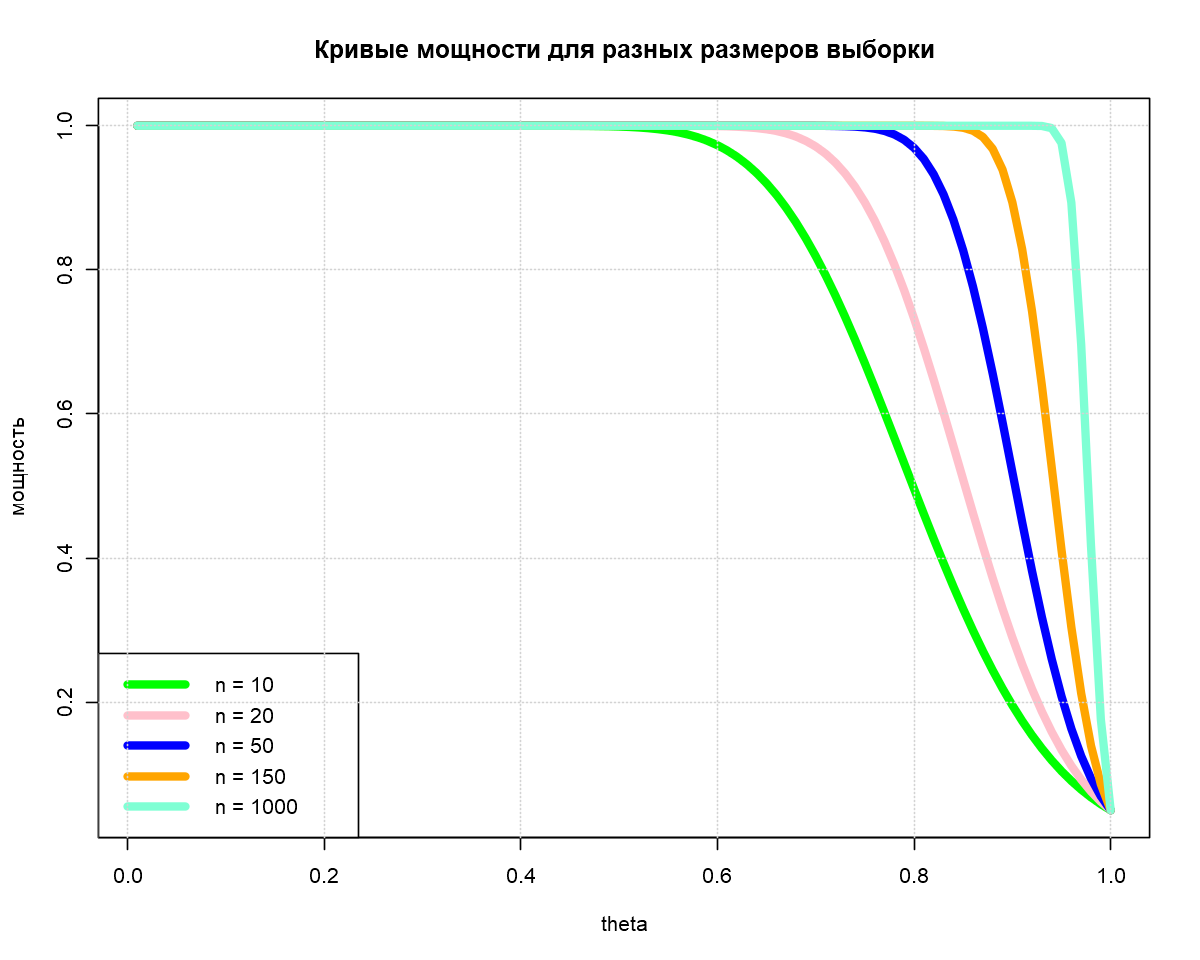

In [72]:
n_grid = c(10, 20, 50, 150, 1000)
theta_grid = seq(0.01, 1, 0.01)

y = c()

for (n in n_grid) {
#     print(n)
    y_i = f(n = n, theta = theta_grid, theta_0 = theta_0, beta = beta)
    y = cbind(y, y_i)
}
matplot(theta_grid, y, type = 'l', lwd = 5, xlab = 'theta', ylab = 'мощность', lty = c(1, 1, 1, 1, 1), 
     col = c('green', 'pink', 'blue', 'orange', 'aquamarine'), main = 'Кривые мощности для разных размеров выборки')
legend("bottomleft", legend = c('n = 10', 'n = 20', 'n = 50', 'n = 150', 'n = 1000'),
       lty = c(1, 1, 1, 1, 1), lwd = 5, col = c('green', 'pink', 'blue', 'orange', 'aquamarine'))
grid()

### Задача 2.

Данные классического эксперимента Майкельсона по измерению скорости света с помощью вращающегося зеркала, 100 наблюдений:

In [73]:
speed <- scan("speed.txt")
print(speed)

  [1] 299850 299740 299900 300070 299930 299850 299950 299980 299980 299880
 [11] 300000 299980 299930 299650 299760 299810 300000 300000 299960 299960
 [21] 299960 299940 299960 299940 299880 299800 299850 299880 299900 299840
 [31] 299830 299790 299810 299880 299880 299830 299800 299790 299760 299800
 [41] 299880 299880 299880 299860 299720 299720 299620 299860 299970 299950
 [51] 299880 299910 299850 299870 299840 299840 299850 299840 299840 299840
 [61] 299890 299810 299810 299820 299800 299770 299760 299740 299750 299760
 [71] 299910 299920 299890 299860 299880 299720 299840 299850 299850 299780
 [81] 299890 299840 299780 299810 299760 299810 299790 299810 299820 299850
 [91] 299870 299870 299810 299740 299810 299940 299950 299800 299810 299870


Требуется исследовать данные на нормальность. При построении графиков подписывайте оси и сам график.

Постройте гистограмму по данным

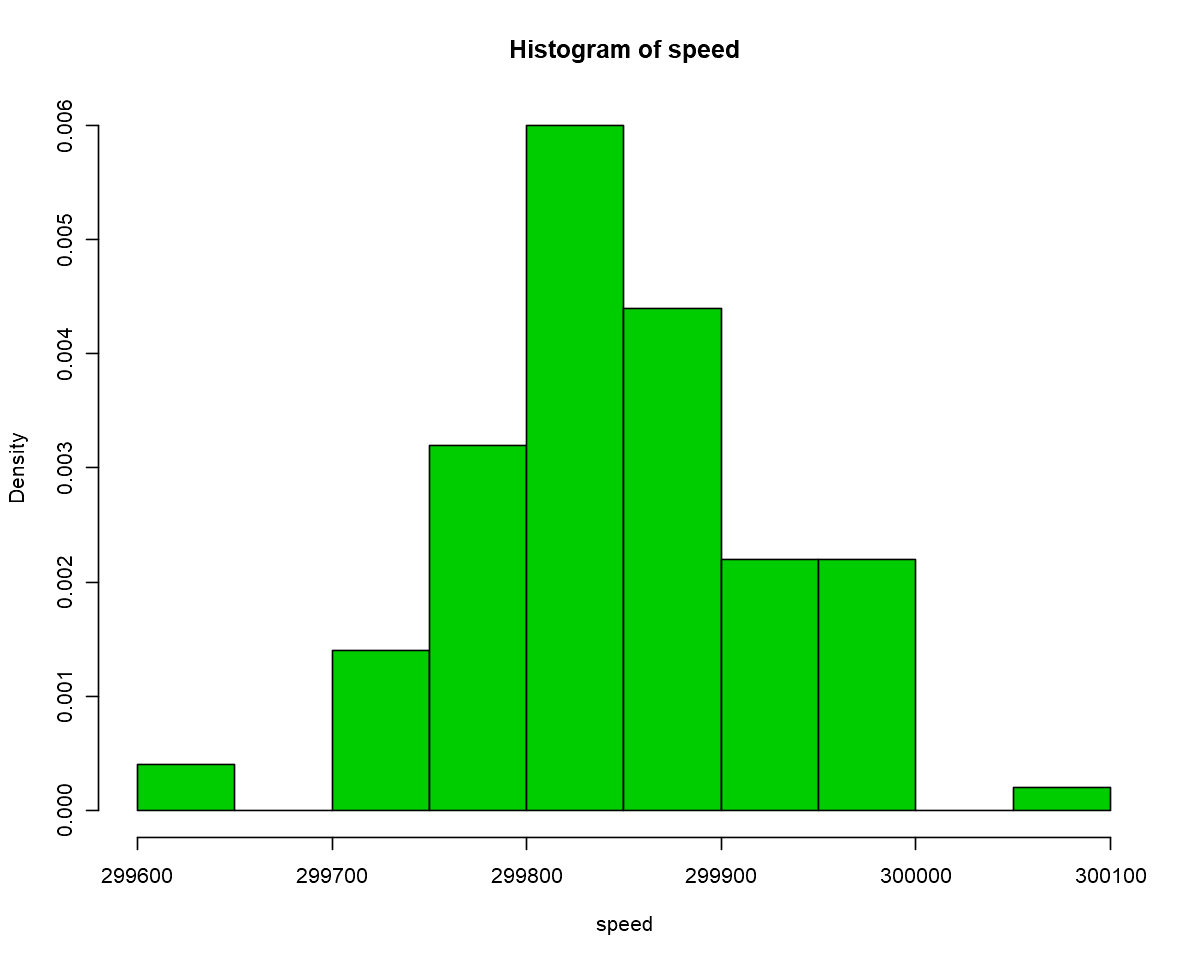

In [74]:
hist(speed, freq = F, col = 3, nclass = 10)

Постройте график ядерной оценки плотности, на который нанесите также график плотности нормального распределения, параметры которого соответствуют оценке максимального правдоподобия по данным.

*Замечание.* Функция `plot` создает новую фигуру и рисует линию/точки. Функция `lines` рисует линию/точки на уже *существующей* фигуре. Тип линии или точек определяется параметром `type `.

In [75]:
x = matrix(seq(min(speed) - 1000, max(speed) + 1000, length.out = 1000), ncol = 1000, nrow = length(speed))
length(x[,1])
length(x[1,])

[1] 100

[1] 1000

In [76]:
X = matrix(speed, ncol = 1000, nrow = length(speed))
length(X[,1])
length(X[1,])

[1] 100

[1] 1000

In [77]:
a_omp = mean(speed)
sigma_omp = sd(speed)
a_omp
sigma_omp 

[1] 299852.4

[1] 79.01055

In [78]:
kde = function(h, x, X, q) {
    n = length(X)
    s = 0
    for (i in 1:n) {
        s = s + q((x - X[i]) / h)
    }
    return (s / (n * h))
}

In [79]:
h = sigma_omp
q = dnorm

In [80]:
x = seq(min(speed) - 1000, max(speed) + 1000, length.out = 1000)
kde_arr = kde(h, x, speed, q)
norm_arr = dnorm(x, mean = a_omp, sd = sigma_omp)

In [81]:
y = cbind(kde_arr, norm_arr)

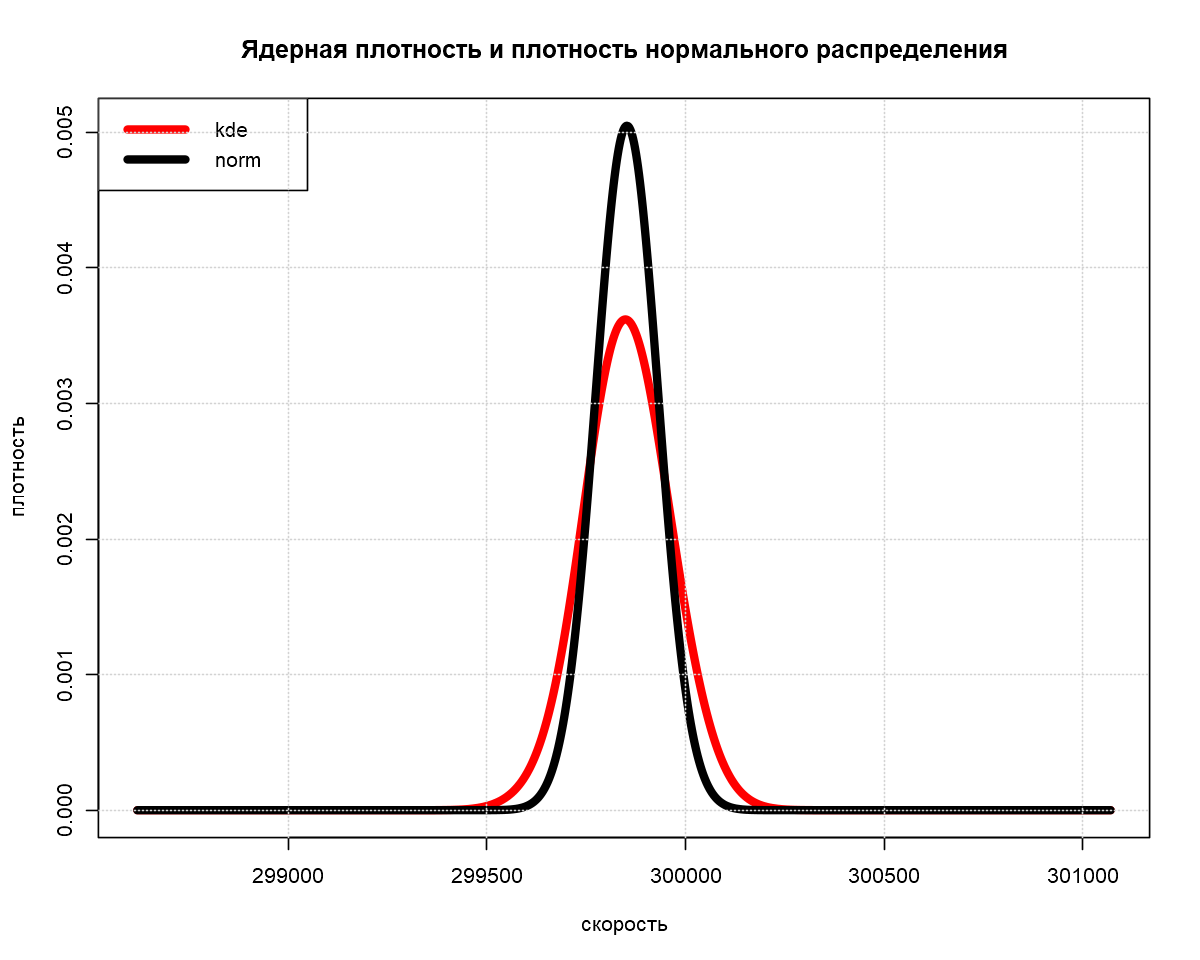

In [82]:
matplot(x, y, type = 'l', col = c('red', 'black'), lwd = 5, xlab = 'скорость', ylab = 'плотность', lty = c(1, 1), 
        main = 'Ядерная плотность и плотность нормального распределения')
legend("topleft", legend = c('kde', 'norm'), col = c('red', 'black'), lty = c(1, 1), lwd = 5)
grid()

Постройте график эмпирической функции распределения, на который нанесите также график функции распределения нормального распределения, параметры которого соответствуют оценке максимального правдоподобия по данным. Добавьте на график сетку.

*Замечание.* При отрисовке ЭФР установите параметры:
* `verticals = TRUE` — рисовать вертикальные линии;
* `pch = NA` — не рисовать точки.

In [83]:
length(X[X <= x])

[1] 49600

In [84]:
j = 300000
length(speed)

[1] 100

In [85]:
empiric = function(x, X) {
    emp = c()
    for (i in (1:length(x))) {
        cur_emp = length(X[X <= x[i]]) / length(X)
        emp = c(emp, cur_emp)
    }
    return(emp)
}

In [86]:
empiric_arr = empiric(x, speed)
norm_cdf = pnorm(q = x, mean = a_omp, sd = sigma_omp)

In [87]:
y = cbind(empiric_arr, norm_cdf)

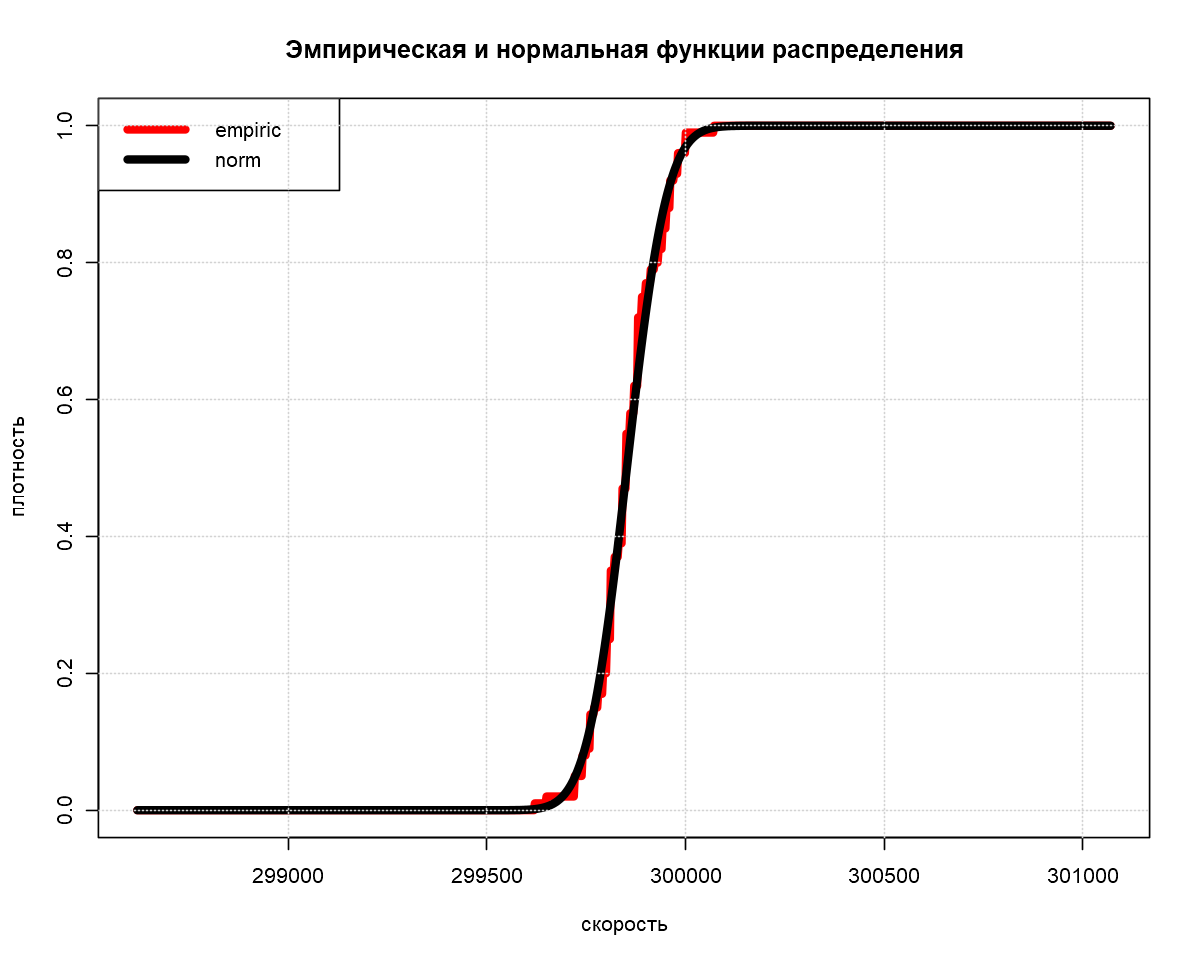

In [88]:
matplot(x, y, type = c('l', 'l'), col = c('red', 'black'), lwd = 5, xlab = 'скорость', ylab = 'плотность', lty = c(1, 1), 
       main = 'Эмпирическая и нормальная функции распределения')
legend("topleft", legend = c('empiric', 'norm'), col = c('red', 'black'), lty = c(1, 1), lwd = 5)
grid()

Простройте по данным Q-Q plot

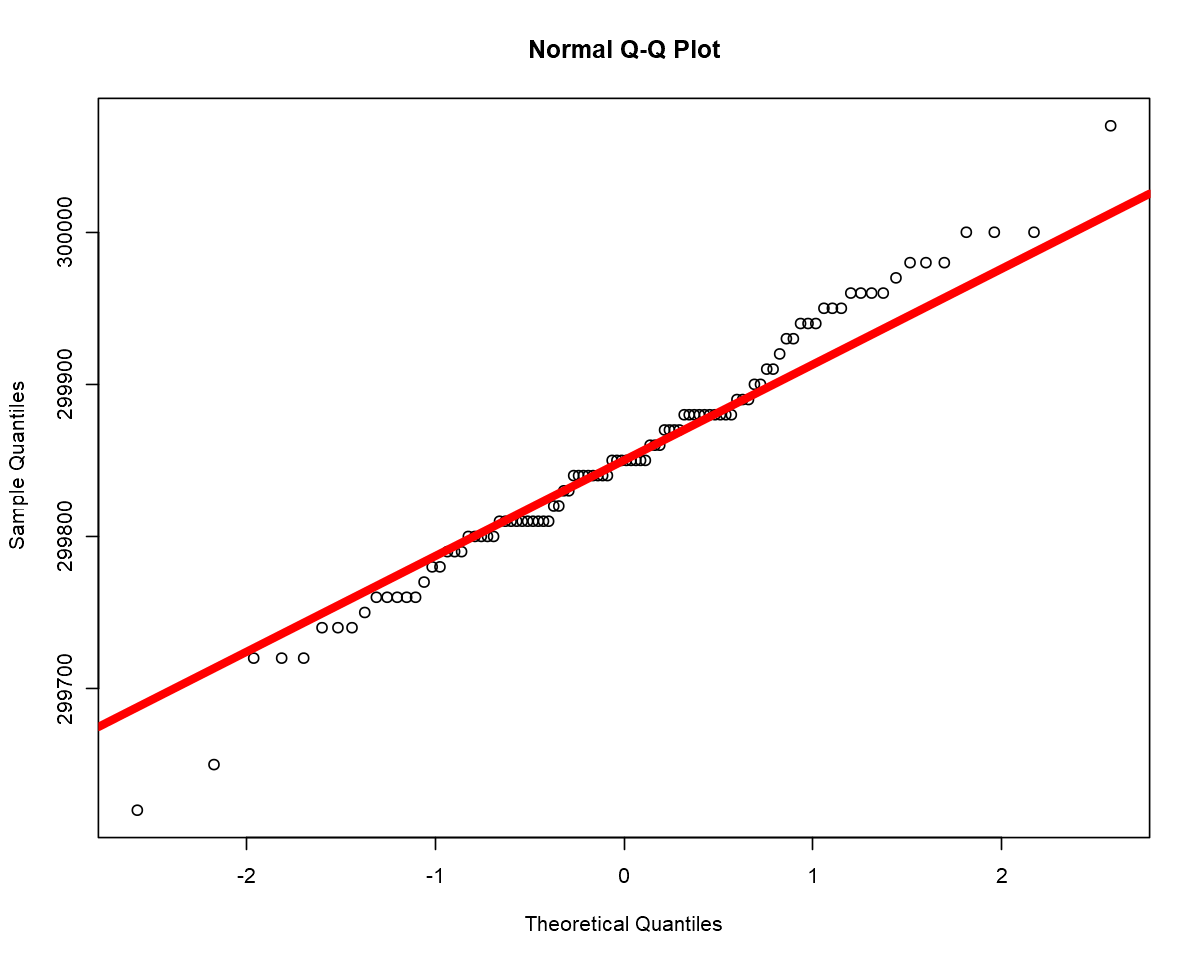

In [89]:
qqnorm(speed)
qqline(speed, lwd=5, col='red')

Примените к данным критерии Лиллиефорса, Андерсона-Дарлинга, Крамера-фон Мизеса, Жарка-Бера и Шапиро-Уилка

In [90]:
install.packages('nortest')
library('nortest')
install.packages('normtest')
library('normtest')

Warning message:
"package 'nortest' is in use and will not be installed"
Warning message:
"package 'normtest' is in use and will not be installed"


In [91]:
lil = lillie.test(speed)
lil


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  speed
D = 0.083424, p-value = 0.08289


In [92]:
ad = ad.test(speed)
ad


	Anderson-Darling normality test

data:  speed
A = 0.46076, p-value = 0.255


In [93]:
cvm = cvm.test(speed)
cvm


	Cramer-von Mises normality test

data:  speed
W = 0.077203, p-value = 0.2227


In [94]:
jb = jb.norm.test(speed)
jb


	Jarque-Bera test for normality

data:  speed
JB = 0.29492, p-value = 0.8615


Сохраните p-value каждого критерия в вектор. Для этого у результата нужно взять поле `p.value`. Не забудьте, что в R символ `.` (точка) является частью имени переменной.

In [95]:
pvals = c(lil$p.value, ad$p.value, cvm$p.value, jb$p.value)
pvals
pvals < 0.05

[1] 0.08289043 0.25495663 0.22273420 0.86150000

[1] FALSE FALSE FALSE FALSE

Примените к ним процедуру множественной проверки гипотез по методу Холма

In [96]:
corr_pvals = p.adjust(pvals, method = 'holm')
corr_pvals
corr_pvals < 0.05

[1] 0.3315617 0.6682026 0.6682026 0.8615000

[1] FALSE FALSE FALSE FALSE

Сделайте выводы:

...

### Задача 3

Скачайте <a href="https://raw.githubusercontent.com/bdemeshev/em301/master/datasets/flats_moscow.txt">данные</a> о стоимости квартир в Москве.	Описание данных доступно по <a href="https://github.com/bdemeshev/em301/blob/master/datasets/flats_moscow_description.txt">ccылке</a>.
	
Обучите линейную регрессионную модель для предсказания цены квартиры от всех других параметров. Проверьте гипотезы о незначимости признаков и постройте доверительные интервалы для коэффициентов модели. Определите признаки желаемой для себя квартиры в Москве и постройте предсказательный интервал ее цены.

Сравните качество модели на всех признаках и качество модели на признаках, отобранных при оптимизации AIC.

In [97]:
flats <- read.table("flats_moscow.txt", header = T)
flats[1:5,]

n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
1,81,58,40,6,12.5,7,1,1,1,3
2,75,44,28,6,13.5,7,1,0,1,6
3,128,70,42,6,14.5,3,1,1,1,3
4,95,61,37,6,13.5,7,1,0,1,1
5,330,104,60,11,10.5,7,0,1,1,3


In [98]:
cat_features = c('walk', 'brick', 'floor', 'code')
cat_features_to_be_encoded = c('code')

In [99]:
str(flats)

'data.frame':	2040 obs. of  11 variables:
 $ n       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ price   : int  81 75 128 95 330 137 98 88 225 140 ...
 $ totsp   : int  58 44 70 61 104 76 59 55 80 86 ...
 $ livesp  : int  40 28 42 37 60 50 39 36 56 51 ...
 $ kitsp   : num  6 6 6 6 11 9 6 6 9 10 ...
 $ dist    : num  12.5 13.5 14.5 13.5 10.5 11 7.5 9 9 12.7 ...
 $ metrdist: int  7 7 3 7 7 7 10 5 5 10 ...
 $ walk    : int  1 1 1 1 0 1 0 1 1 1 ...
 $ brick   : int  1 0 1 0 1 1 0 1 1 0 ...
 $ floor   : int  1 1 1 1 1 1 1 0 1 1 ...
 $ code    : int  3 6 3 1 3 8 8 4 3 5 ...


In [100]:
install.packages('mltools')
library(mltools)
install.packages('data.table')
library(data.table)

Warning message:
"package 'mltools' is in use and will not be installed"



  There is a binary version available but the source version is later:
           binary source needs_compilation
data.table 1.14.0 1.14.2              TRUE

  Binaries will be installed


Warning message:
"package 'data.table' is in use and will not be installed"


In [101]:
flats$'code' = as.factor(flats$'code')
flats[1:5,]

n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
1,81,58,40,6,12.5,7,1,1,1,3
2,75,44,28,6,13.5,7,1,0,1,6
3,128,70,42,6,14.5,3,1,1,1,3
4,95,61,37,6,13.5,7,1,0,1,1
5,330,104,60,11,10.5,7,0,1,1,3


In [102]:
encoded_code = one_hot(as.data.table(flats$'code'))
encoded_code$n = seq.int(nrow(encoded_code))
encoded_code[1:5,]

V1_1,V1_2,V1_3,V1_4,V1_5,V1_6,V1_7,V1_8,n
0,0,1,0,0,0,0,0,1
0,0,0,0,0,1,0,0,2
0,0,1,0,0,0,0,0,3
1,0,0,0,0,0,0,0,4
0,0,1,0,0,0,0,0,5


In [103]:
encoded_flats = flats[-11]
encoded_flats = merge(encoded_flats, encoded_code, by = c('n'))
encoded_flats = encoded_flats[-1]
encoded_flats[1:5,]

price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,V1_1,V1_2,V1_3,V1_4,V1_5,V1_6,V1_7,V1_8
81,58,40,6,12.5,7,1,1,1,0,0,1,0,0,0,0,0
75,44,28,6,13.5,7,1,0,1,0,0,0,0,0,1,0,0
128,70,42,6,14.5,3,1,1,1,0,0,1,0,0,0,0,0
95,61,37,6,13.5,7,1,0,1,1,0,0,0,0,0,0,0
330,104,60,11,10.5,7,0,1,1,0,0,1,0,0,0,0,0


In [114]:
devtools::install_cran("recipes")

Installing 1 packages: recipes

also installing the dependencies 'glue', 'ipred', 'rlang'





  There are binary versions available but the source versions are later:
        binary source needs_compilation
glue     1.4.2  1.6.2              TRUE
ipred   0.9-11 0.9-12              TRUE
rlang   0.4.11  1.0.2              TRUE
recipes 0.1.16  0.2.0             FALSE

  Binaries will be installed
package 'glue' successfully unpacked and MD5 sums checked


ERROR: Error: (конвертировано из предупреждения) cannot remove prior installation of package 'glue'


In [113]:
install.packages("devtools")

also installing the dependencies 'gert', 'glue', 'digest', 'usethis', 'cli', 'pkgload', 'rcmdcheck', 'rlang', 'sessioninfo'





  There are binary versions available but the source versions are later:
            binary source needs_compilation
gert         1.3.0  1.5.0              TRUE
glue         1.4.2  1.6.2              TRUE
digest      0.6.27 0.6.29              TRUE
usethis      2.0.1  2.1.5             FALSE
cli          2.5.0  3.2.0              TRUE
pkgload      1.2.1  1.2.4             FALSE
rcmdcheck    1.3.3  1.4.0             FALSE
rlang       0.4.11  1.0.2              TRUE
sessioninfo  1.1.1  1.2.2             FALSE
devtools     2.4.1  2.4.3             FALSE

  Binaries will be installed
package 'gert' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"


package 'digest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'digest'"


package 'cli' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"



The downloaded binary packages are in
	C:\Users\poloz\AppData\Local\Temp\RtmpUd3zI2\downloaded_packages


installing the source packages 'usethis', 'pkgload', 'rcmdcheck', 'sessioninfo', 'devtools'


Warning message in install.packages("devtools"):
"installation of package 'usethis' had non-zero exit status"
Warning message in install.packages("devtools"):
"installation of package 'pkgload' had non-zero exit status"
Warning message in install.packages("devtools"):
"installation of package 'sessioninfo' had non-zero exit status"
Warning message in install.packages("devtools"):
"installation of package 'rcmdcheck' had non-zero exit status"
Warning message in install.packages("devtools"):
"installation of package 'devtools' had non-zero exit status"


In [111]:
install.packages("recipes", dependencies = c("Depends", "Suggests")) 

Warning message:
"dependencies 'fastICA', 'randomForest', 'echarts4r', 'irlba', 'foreign', 'graph', 'Rgraphviz', 'spDataLarge', 'webshot2', 'ComplexHeatmap', 'glmmADMB', 'cmdstanr', 'equatags' are not available"
also installing the dependencies 'lattice', 'flextable', 'officer', 'rasterVis', 'brms', 'gtsummary', 'viridis', 'R2jags', 'servr', 'broom.helpers', 'network', 'scagnostics', 'heatmaply', 'circlize', 'dotwhisker', 'broom.mixed', 'simplermarkdown', 'bookdown', 'asciicast', 'GGally', 'dendextend', 'mgcViz', 'glmmTMB', 'digest', 'foghorn', 'gmailr', 'rticles', 'cli', 'profvis', 'vdiffr', 'highcharter', 'plotly', 'effects', 'DHARMa', 'pglm', 'splm', 'attachment', 'devtools', 'dockerfiler', 'pkgdown', 'rcmdcheck', 'rlang', 'ggplot2', 'shinyEffects', 'shinyjqui', 'Bergm', 'spData', 'GLMMadaptive', 'pder', 'psychTools', 'golem', 'paletteer', 'rvest', 'sessioninfo', 'shinydashboard', 'shinydashboardPlus', 'roxygen2', 'tfestimators', 'btergm', 'epiR', 'fixest', 'lavaan', 'metafor', 'plm


  There are binary versions available but the source versions are later:
                    binary  source needs_compilation
lattice            0.20-44 0.20-45              TRUE
flextable            0.6.5   0.7.0             FALSE
officer             0.3.18   0.4.1             FALSE
rasterVis             0.47  0.51.2             FALSE
brms                2.15.0  2.16.3             FALSE
gtsummary            1.4.0   1.5.2             FALSE
viridis              0.6.1   0.6.2             FALSE
R2jags               0.6-1   0.7-1             FALSE
servr                 0.22    0.24             FALSE
broom.helpers        1.3.0   1.6.0             FALSE
network             1.16.1  1.17.1              TRUE
scagnostics        0.2-4.1   0.2-6             FALSE
heatmaply            1.2.1   1.3.0             FALSE
circlize            0.4.12  0.4.14             FALSE
dotwhisker           0.6.0   0.7.4             FALSE
broom.mixed          0.2.6   0.2.7             FALSE
bookdown              0.2

Warning message:
"package 'lattice' is in use and will not be installed"


package 'network' successfully unpacked and MD5 sums checked
package 'asciicast' successfully unpacked and MD5 sums checked
package 'glmmTMB' successfully unpacked and MD5 sums checked
package 'digest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'digest'"


package 'cli' successfully unpacked and MD5 sums checked
package 'profvis' successfully unpacked and MD5 sums checked
package 'vdiffr' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"


package 'roxygen2' successfully unpacked and MD5 sums checked
package 'fixest' successfully unpacked and MD5 sums checked
package 'htmltools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'htmltools'"


package 'survival' successfully unpacked and MD5 sums checked
package 'xgboost' successfully unpacked and MD5 sums checked
package 'testthat' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\poloz\AppData\Local\Temp\RtmpUd3zI2\downloaded_packages


installing the source packages 'flextable', 'officer', 'rasterVis', 'brms', 'gtsummary', 'viridis', 'R2jags', 'servr', 'broom.helpers', 'scagnostics', 'heatmaply', 'circlize', 'dotwhisker', 'broom.mixed', 'simplermarkdown', 'bookdown', 'GGally', 'dendextend', 'mgcViz', 'foghorn', 'gmailr', 'rticles', 'highcharter', 'plotly', 'effects', 'DHARMa', 'pglm', 'splm', 'attachment', 'devtools', 'dockerfiler', 'pkgdown', 'rcmdcheck', 'ggplot2', 'shinyEffects', 'shinyjqui', 'Bergm', 'spData', 'GLMMadaptive', 'pder', 'psychTools', 'golem', 'paletteer', 'rvest', 'sessioninfo', 'shinydashboard', 'shinydashboardPlus', 'tfestimators', 'btergm', 'epiR', 'lavaan', 'metafor', 'plm', 'psych', 'survey', 'bs4Dash', 'gt', 'paws', 'pkgload', 'reprex', 'shinybusy', 'shinyWidgets', 'usethis', 'tfdatasets', 'broom', 'DiagrammeR', 'leaflet', 'shinytest', 'mockery', 'tinytex', 'bslib', 'targets', 'tensorflow', 'keras', 'sparklyr', 'rsconnect', 'downlit', 'shiny', 'tufte', 'butcher', 'knitr', 'parsnip', 'rmarkdown

Warning message in install.packages("recipes", dependencies = c("Depends", "Suggests")):
"installation of package 'tfdatasets' had non-zero exit status"
Warning message in install.packages("recipes", dependencies = c("Depends", "Suggests")):
"installation of package 'broom' had non-zero exit status"
Warning message in install.packages("recipes", dependencies = c("Depends", "Suggests")):
"installation of package 'targets' had non-zero exit status"
Warning message in install.packages("recipes", dependencies = c("Depends", "Suggests")):
"installation of package 'keras' had non-zero exit status"
Warning message in install.packages("recipes", dependencies = c("Depends", "Suggests")):
"installation of package 'shiny' had non-zero exit status"
Warning message in install.packages("recipes", dependencies = c("Depends", "Suggests")):
"installation of package 'butcher' had non-zero exit status"
Warning message in install.packages("recipes", dependencies = c("Depends", "Suggests")):
"installation 

In [112]:
install.packages('https://cran.r-project.org/src/contrib/Archive/recipes/recipes_0.1.16.tar.gz')

inferring 'repos = NULL' from 'pkgs'

Warning message in install.packages("https://cran.r-project.org/src/contrib/Archive/recipes/recipes_0.1.16.tar.gz", :
"installation of package 'C:/Users/poloz/AppData/Local/Temp/RtmpUd3zI2/downloaded_packages/recipes_0.1.16.tar.gz' had non-zero exit status"


In [105]:
install.packages('caret')
library('caret')

also installing the dependencies 'ipred', 'rlang', 'recipes'





  There are binary versions available but the source versions are later:
        binary source needs_compilation
ipred   0.9-11 0.9-12              TRUE
rlang   0.4.11  1.0.2              TRUE
recipes 0.1.16  0.2.0             FALSE
caret   6.0-86 6.0-91              TRUE

  Binaries will be installed
package 'ipred' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"


package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\poloz\AppData\Local\Temp\RtmpUd3zI2\downloaded_packages


installing the source package 'recipes'


Warning message in install.packages("caret"):
"installation of package 'recipes' had non-zero exit status"
Warning message:
"package 'caret' was built under R version 3.6.3"


ERROR: Error: package or namespace load failed for 'caret' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 there is no package called 'recipes'


In [ ]:
partition <- createDataPartition(y = encoded_flats$price, p = 0.7, list = FALSE)
train <- encoded_flats[partition,]
test <- encoded_flats[-partition,]
test

In [ ]:
model = lm(formula = encoded_flats ~ ., data = train)

### Задача 4

*Эту задачу можно выполнить в Питоне. Можно в отдельном ноутбуке.*

Проведите эксперимент по определению реального уровня значимости критерия для проверки гипотезы о незначимости коэффициента в гауссовской линейной модели, если на самом деле в данных присутствует гетероскедастичность. 
Для этого смоделируйте некоторым образом двумерные данные $x$ и посчитайте по ним ожидаемый отклик 
	$y(x) = \theta_0 + \theta_1 x^{(1)} + \theta_2 x^{(2)}$, где коэффициенты выберите по своему усмотрению, причем $\theta_2 = 0$. 
Зашумите набор значений $y(x_i)$ некоторым шумом, дисперсия которого зависит от $x$ или от номера наблюдения. 
По таким данным обучите	линейную модель и проверьте гипотезу $\mathsf{H}_0\colon \theta_2 = 0$. 
Повторите эксперимент несколько раз и посчитайте долю случаев, в которых гипотеза отвергается. Распределение шума должно быть одинаковым в каждом эксперименте.

### Задача 5
Загрузите датасет `galapagos.csv`, в котором содержатся данные об островах на Галапагосском архипелаге:
* `island` -- наименование острова;
* `species` -- количество наблюдаемых видов растений на острове;
* `endemics` -- количество уникальных видов [*в задаче не рассматриваем*];
* `area` -- площадь (км^2);
* `elevation` -- высота (м);
* `nearest` -- расстояние до ближайшего острова (км);
* `scruz` -- расстояние до самого крупного острова архипелага Санта-Крус (км);
* `adjacent` -- площадь соседнего острова (км^2).

In [ ]:
galapagos = read.csv('galapagos.csv', sep = ';')
galapagos = galapagos[c(-1, -3)]
galapagos[1:5,]

Рассмотрим пуассоновскую (колличественную) регрессию. Какая ожидается зависимость отклика от признаков?

*Подсказка:* чему равно математическое ожидание отклика?

<...>

Постройте графики зависимости отклика `species` от всех признаков. Значения каких признаков лучше прологарифмировать? 

In [ ]:
for (i in 2:length(galapagos)) {
    plot(galapagos[[1]] ~ galapagos[[i]], xlab = names(galapagos)[i], ylab = names(galapagos)[1], col = 'red')
    grid()
}

Обучите пуассоновскую регрессию по всем признакам, предварительно прологарифмировав некоторых из них. В R регрессию можно сделать функцией `glm`, указав конкретный тип обобщенной модели как `family = poisson()`. Напечатайте `summary` модели.

Надо прологарифмировать признаки `area`, `elevation`, `adjacent`.

In [ ]:
galapagos$'log_area' = log(galapagos$'area')
galapagos$'log_elevation' = log(galapagos$'elevation')
galapagos$'log_adjacent' = log(galapagos$'adjacent')
galapagos[1:5,]

Оставьте только значимые признаки, обучите модель еще раз и проинтерпретируйте полученные результаты. Какой смысл имеют коэффициенты модели?

При использовании статистических свойств необходимо выполнить проверку предположений модели. Аналогом гомоскедастичности для гауссовской линейной модели в случае пуассоновской регрессии является равенство математического ожидания и дисперсии (это свойство пуассоновского распределения). 

Аналогично гауссовской линейной модели можно определить устойчивые оценки дисперсии. Посчитайте и напечатайте ковариационную матрицу оценок коэффициентов модели с помощью функции `vcovHC`, рассмотрев тип оценки `HC3`.

Напечатайте таблицу статистических свойств оценок коэффициентов и доверительные интервалы. Для этого можно использовать те же функции, что и для гауссовской модели.

Придумайте на Галапагосском архипелаге еще один остров, задайте ему некоторые характеристики и назовите своим именем. Оцените, в каком интервале лежит ожидаемое количество видов растений на этом острове.

*Указания.* Установите в функции `predict` опцию `se.fit = TRUE`. Из полученных значений сформируйте доверительный интервал линеаризованного отклика. Доверительный интервал для ожидаемого отклика получите с помощью функции `<имя обученной модели>$family$linkinv`.

Наконец, получите предсказательный интервал для количества растений на вашем острове. Для этого посчитайте предсказательные интервалы для пуассоновских случайных величин, параметры которых соответствуют границам доверительного интервала, построенного на предыдущем шаге. Объедините эти два интервала.